# Tesla Stock Price Prediction

**PROBLEM STATEMENT**

The stock market sector is a very lucrative one, which is highly unpredictable and thus the a need to study the events around the market fluctuations and time. This project specifically predicts the price of future or unseen data based on historical data using suitable supervised learning algorithms on the Tesla Stock Price. This forecast is necessary to aid investors and stock merchants make the best decisions.

The Tesla_Stock_Price dataset was obtained from Yahoo Finance within the timeframe of 06/29/2010 to 06/12/2023.

**PARAMETERS OVERVIEW**
- Date: Represents the date at which the share is traded in the stock market.
- Open: Represents the opening price of the stock at a particular date. It is the price at which a stock started trading when the opening bell rang.
- Close: Represents the closing price of the stock at a particular date. It is the last buy-sell order executed between two traders. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.
- High: The high is the highest price at which a stock is traded during a period. Here the period is a day.
- Low: The low is the lowest price at which a stock is traded during a period. Here the period is a day.
- Adj Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.
- Volume: Volume is the number of shares of security traded during a given period of time. Here the security is stock and the period of time is a day.

### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To gain access to the data content, you have to read in the data using the pandas library
data = pd.read_csv('Tesla_Stock_prices.csv')

# To view the first few rows of the data, attach '.head' function to the data's name
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### Data Preprocessing and Exploratory Data Analysis

In [3]:
# For basic data info and data types, the below code will be used
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3261 non-null   object 
 1   Open       3261 non-null   float64
 2   High       3261 non-null   float64
 3   Low        3261 non-null   float64
 4   Close      3261 non-null   float64
 5   Adj Close  3261 non-null   float64
 6   Volume     3261 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 178.5+ KB


In [4]:
# The data type of Date should not be an object but rather datetime. It is advisable to change it to the proper datatype
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3261 non-null   datetime64[ns]
 1   Open       3261 non-null   float64       
 2   High       3261 non-null   float64       
 3   Low        3261 non-null   float64       
 4   Close      3261 non-null   float64       
 5   Adj Close  3261 non-null   float64       
 6   Volume     3261 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 178.5 KB


In [5]:
# Check for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Checking for duplicates
data.duplicated().sum()

0

In [7]:
# Summary of the data
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3261,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03
mean,2016-12-18 13:32:30.689972224,62.917564,64.338205,61.376366,62.895762,62.895762,9.572551e+07
min,2010-06-29 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,2013-09-24 00:00:00,9.656667,9.882667,9.438667,9.660000,9.660000,4.389840e+07
50%,2016-12-16 00:00:00,16.546667,16.788000,16.353333,16.559999,16.559999,7.809180e+07
75%,2020-03-17 00:00:00,46.733334,49.318001,45.618000,47.042000,47.042000,1.224465e+08
max,2023-06-12 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,96.610729,98.837821,94.132775,96.520274,96.520274,8.141501e+07


In [8]:
# For the size of the data
data.shape

(3261, 7)

### Exploratory Data analysis(EDA)

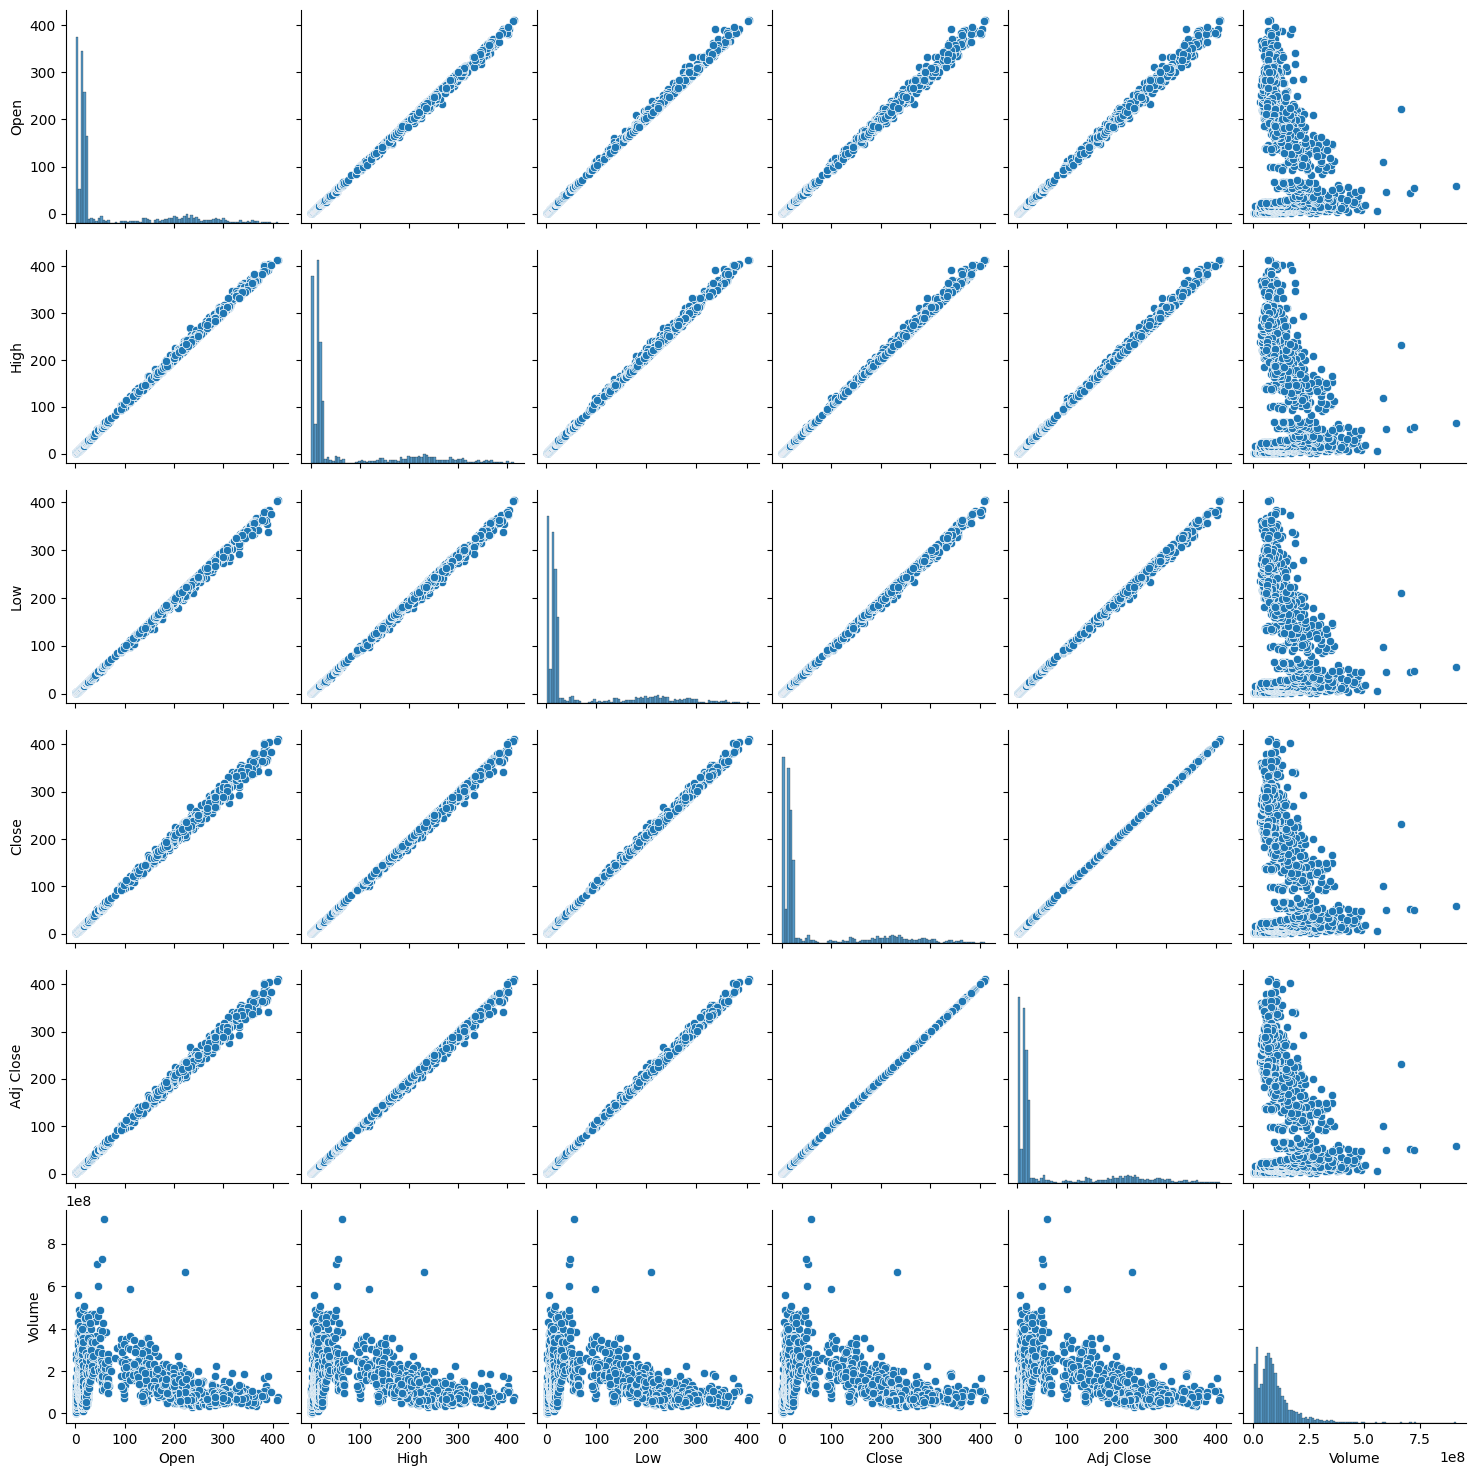

In [9]:
sns.pairplot(data)

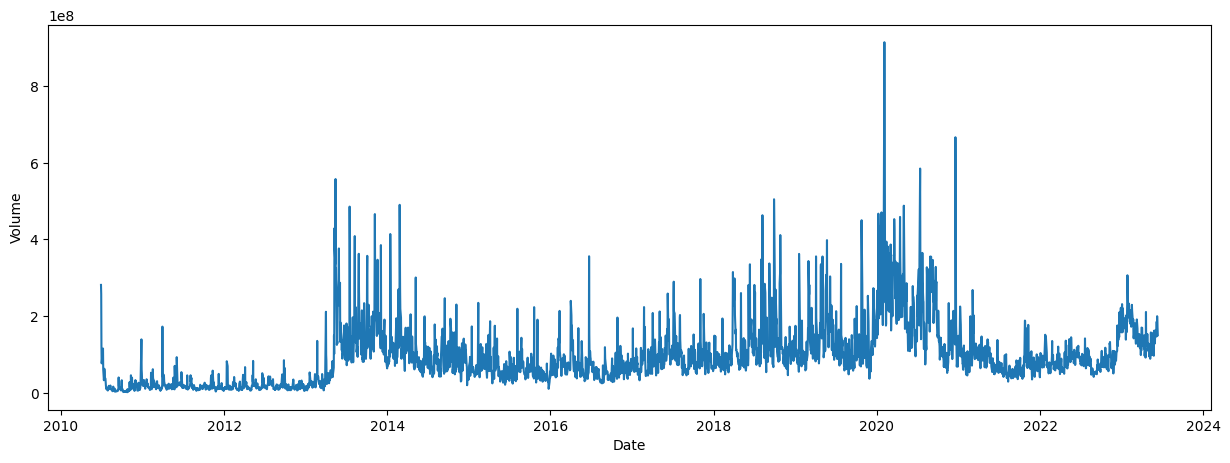

In [10]:
# time series plot of the volume across the years
plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Volume', data=data)
plt.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

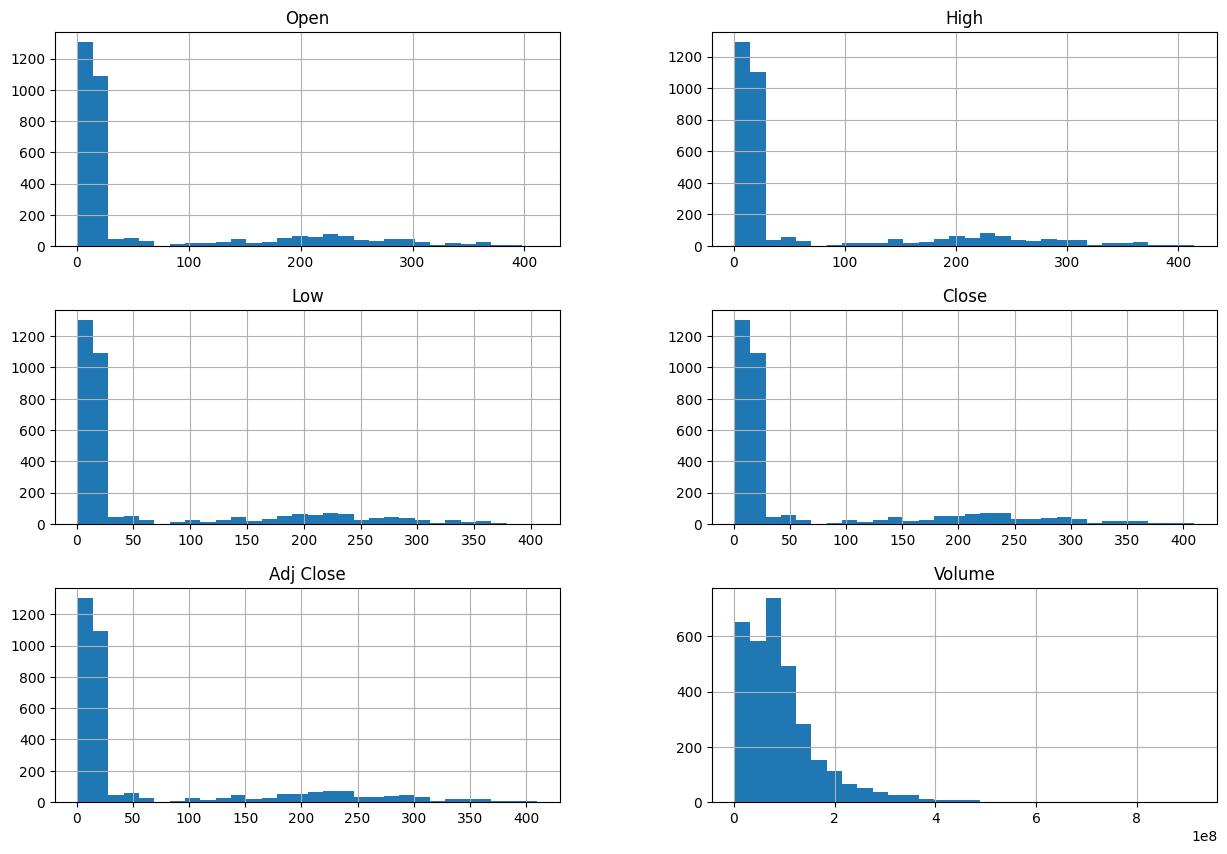

In [11]:
# histogram of the vairables to sho their distribution
data.hist(column=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], figsize=(15, 10), bins=30)

In [12]:
#Checking for the correlation of all the attributes
data.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.739967,0.740175,0.740141,0.740283,0.740283,0.402249
Open,0.739967,1.000000,0.999721,0.999605,0.999195,0.999195,0.087024
High,0.740175,0.999721,1.000000,0.999613,0.999637,0.999637,0.090737
Low,0.740141,0.999605,0.999613,1.000000,0.999675,0.999675,0.083573
Close,0.740283,0.999195,0.999637,0.999675,1.000000,1.000000,0.087995
Adj Close,0.740283,0.999195,0.999637,0.999675,1.000000,1.000000,0.087995
Volume,0.402249,0.087024,0.090737,0.083573,0.087995,0.087995,1.000000


<Axes: >

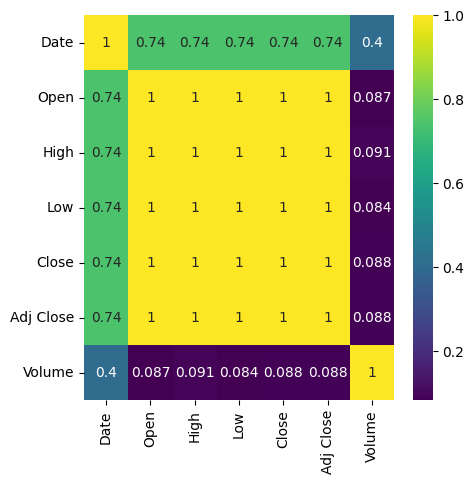

In [13]:
#plotting the correlation of all the attributes
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='viridis')

### Model Training and Prediction

In [14]:
# Decision Tree Regression
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [15]:
date_col = df['Date']
df.set_index('Date',inplace =True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [16]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalized_df['Date'] = date_col
normalized_df.set_index('Date', inplace =True)
normalized_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,0.000465,0.001350,0.000422,0.001319,0.001319,0.306605
2010-06-30,0.001568,0.002224,0.001371,0.001309,0.001309,0.280640
2010-07-01,0.001439,0.001498,0.000871,0.001004,0.001004,0.133184
2010-07-02,0.001114,0.001043,0.000614,0.000554,0.000554,0.082560
2010-07-06,0.000627,0.000543,0.000140,0.000051,0.000051,0.110956


In [17]:
normalized_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999721,0.999605,0.999195,0.999195,0.087024
High,0.999721,1.000000,0.999613,0.999637,0.999637,0.090737
Low,0.999605,0.999613,1.000000,0.999675,0.999675,0.083573
Close,0.999195,0.999637,0.999675,1.000000,1.000000,0.087995
Adj Close,0.999195,0.999637,0.999675,1.000000,1.000000,0.087995
Volume,0.087024,0.090737,0.083573,0.087995,0.087995,1.000000


In [18]:
# Dropping the columns High and Low due to multicollinearity, Close as it is the response variable and Adj Close as it is identical to Close.
X = normalized_df.drop(['Close','High','Low','Adj Close'],axis =1)
y = normalized_df['Close']
# splittig the data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.3, random_state =42)


In [19]:
#Viewing our feature variables
X

,Open,Volume
Date,,
2010-06-29,0.000465,0.306605
2010-06-30,0.001568,0.280640
2010-07-01,0.001439,0.133184
2010-07-02,0.001114,0.082560
2010-07-06,0.000627,0.110956
...,...,...
2023-06-06,0.524043,0.159085
2023-06-07,0.552942,0.201614
2023-06-08,0.543731,0.178353


In [20]:
#Viewing our target variable
y

Date
2010-06-29    0.001319
2010-06-30    0.001309
2010-07-01    0.001004
2010-07-02    0.000554
2010-07-06    0.000051
                ...   
2023-06-06    0.538635
2023-06-07    0.546607
2023-06-08    0.571771
2023-06-09    0.595101
2023-06-12    0.608380
Name: Close, Length: 3261, dtype: float64

**Linear Regression**

In [21]:
linear_model = LinearRegression()

#Fitting the model to the training dataset
linear_model.fit(X_train, y_train)
#Obtaining predictions
predicted_values = linear_model.predict(X_test)

In [22]:
#Measuring regression performance
MAE = mean_absolute_error(y_test, predicted_values)
MSE = mean_squared_error(y_test, predicted_values)
RMSE =np.sqrt(mean_squared_error(y_test, predicted_values))
RSS =np.sum(np.square(y_test, predicted_values))
r2=r2_score(y_test, predicted_values)

In [24]:
results = pd.DataFrame([['Linear regression', MAE, MSE, RMSE, RSS,r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
results

,Model,MAE,MSE,RMSE,RSS,r2_score
0,Linear regression,0.003923,0.000107,0.010356,76.061655,0.782261


In [25]:
lreg_df = pd.DataFrame(data ={"actual_values": y_test, "predictions":predicted_values})
lreg_df.sort_index(ascending=True, inplace=True)
lreg_df

,actual_values,predictions
Date,,
2010-06-29,0.001319,1.739586e-06
2010-07-09,0.000261,6.804411e-08
2010-07-16,0.000789,6.226435e-07
2010-07-20,0.000734,5.382362e-07
2010-07-23,0.000895,8.011107e-07
...,...,...
2023-05-24,0.444703,1.977612e-01
2023-05-26,0.469819,2.207295e-01
2023-06-06,0.538635,2.901272e-01


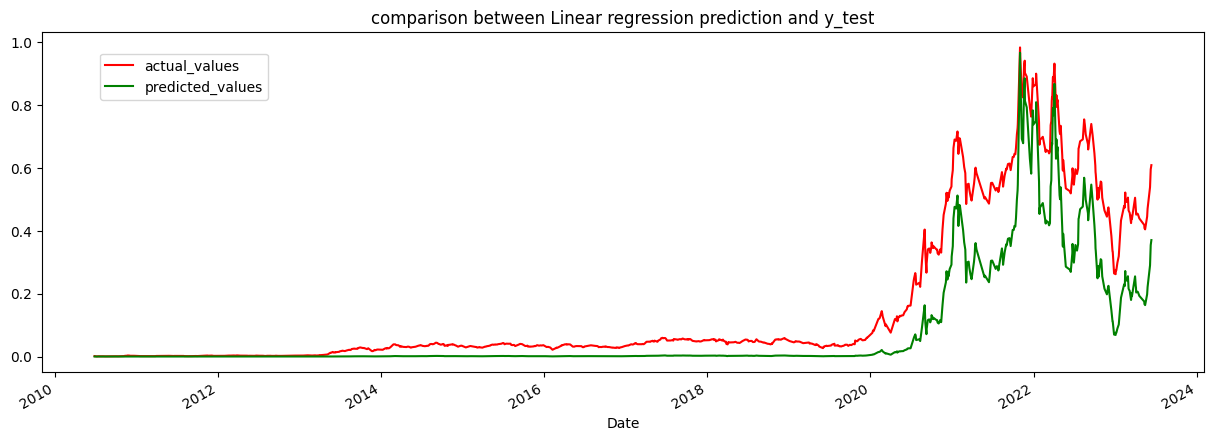

In [26]:
plt.figure(figsize=(15,5))
lreg_df['actual_values'].plot(color='red', label='actual_values')
lreg_df['predictions'].plot(color='green', label='predicted_values')
plt.title("comparison between Linear regression prediction and y_test")
plt.legend(loc =(0.05,0.8))

**Decision Tree**

In [27]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
y_preds = DecisionTree_model.predict(X_test)

In [29]:
# Model Evaluation
mae= mean_absolute_error(y_test, y_preds)
mse= mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mean_squared_error(y_test, y_preds))
rss=np.sum(np.square(y_test, y_preds))
r_squared=r2_score(y_test, y_preds)

In [59]:
model_results = pd.DataFrame([['Decision Tree regression', mae, mse, rmse, rss,r_squared]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
results = pd.concat([results, model_results], ignore_index=True)

In [32]:
dtree_df = pd.DataFrame(data ={"actual_values": y_test, "predictions":y_preds})
dtree_df.sort_index(ascending=True, inplace=True)
dtree_df

,actual_values,predictions
Date,,
2010-06-29,0.001319,1.739586e-06
2010-07-09,0.000261,6.804411e-08
2010-07-16,0.000789,6.226435e-07
2010-07-20,0.000734,5.382362e-07
2010-07-23,0.000895,8.011107e-07
...,...,...
2023-05-24,0.444703,1.977612e-01
2023-05-26,0.469819,2.207295e-01
2023-06-06,0.538635,2.901272e-01


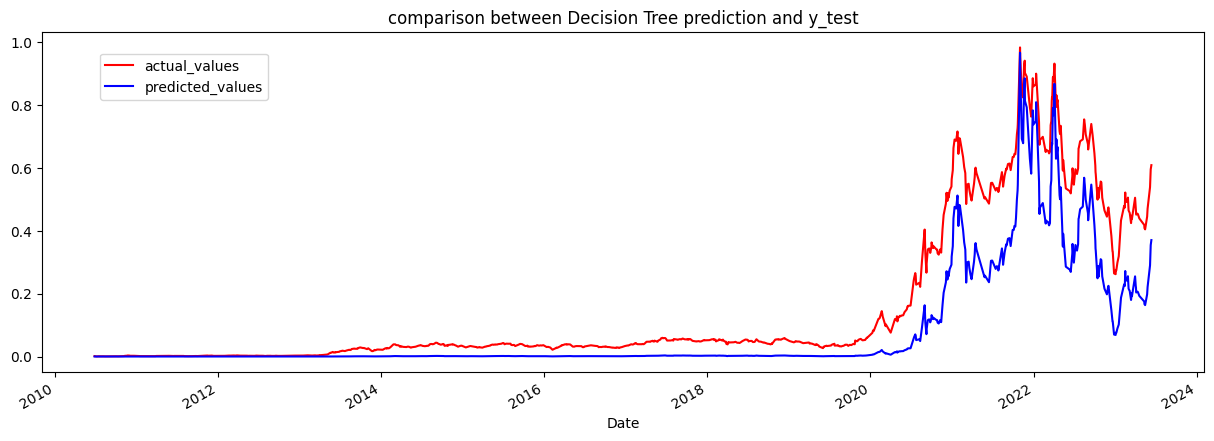

In [33]:
plt.figure(figsize=(15,5))
dtree_df['actual_values'].plot(color='red', label='actual_values')
dtree_df['predictions'].plot(color='blue', label='predicted_values')
plt.title("comparison between Decision Tree prediction and y_test")
plt.legend(loc =(0.05,0.8))

**K Nearest Neighbors**

In [34]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
knn_predictions  = knn.predict(X_test)

In [36]:
print(knn_predictions.shape, y_test.shape)

(979,) (979,)


In [37]:
# getting model scores
knn_r2 = r2_score(y_test, knn_predictions)
knn_mse = mean_squared_error( y_test,knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test,knn_predictions)
knn_rss = np.sum(np.square(y_test, knn_predictions))

In [61]:
model_results = pd.DataFrame([['KNN regression', knn_mae, knn_mse, knn_rmse, knn_rss,knn_r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
results = pd.concat([results, model_results], ignore_index=True)

In [39]:
knn_df = pd.DataFrame(data ={"actual_values": y_test, "predictions":knn_predictions})
knn_df.sort_index(ascending=True, inplace=True)
knn_df

,actual_values,predictions
Date,,
2010-06-29,0.001319,1.739586e-06
2010-07-09,0.000261,6.804411e-08
2010-07-16,0.000789,6.226435e-07
2010-07-20,0.000734,5.382362e-07
2010-07-23,0.000895,8.011107e-07
...,...,...
2023-05-24,0.444703,1.977612e-01
2023-05-26,0.469819,2.207295e-01
2023-06-06,0.538635,2.901272e-01


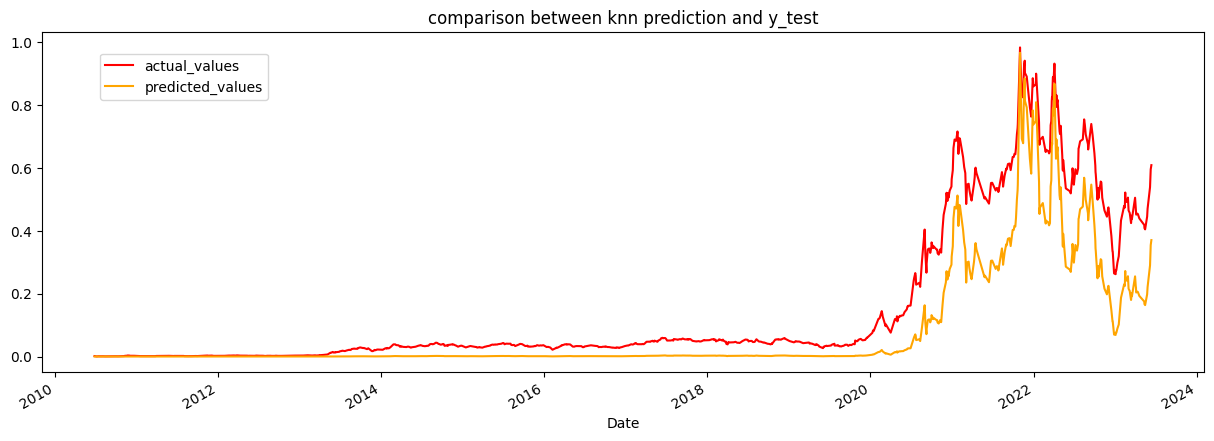

In [40]:
plt.figure(figsize=(15,5))
knn_df['actual_values'].plot(color='red', label='actual_values')
knn_df['predictions'].plot(color='orange', label='predicted_values')
plt.title("comparison between knn prediction and y_test")
plt.legend(loc =(0.05,0.8))

In [63]:
# Printing the stored results of all the three models
results.drop_duplicates()

,Model,MAE,MSE,RMSE,RSS,r2_score
0,Linear regression,0.003923,0.000107,0.010356,76.061655,0.782261
1,Decision Tree regression,0.005969,0.000256,0.015987,76.061655,0.782261
3,KNN regression,0.004939,0.000161,0.012690,76.061655,0.997105


# Testing the model on new data

In [43]:
new_data = pd.read_csv("TSLA.csv")

In [44]:
date = new_data['Date']

In [45]:
new_data.set_index('Date',inplace =True)

In [46]:
norm_df = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

In [47]:
norm_df['Date'] = date

In [48]:
norm_df.set_index('Date', inplace =True)

In [49]:
norm_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-13,0.434154,0.156985,0.408267,0.605601,0.605601,0.212710
2023-06-14,1.000000,0.563441,0.323589,0.191813,0.191813,1.000000
2023-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-16,0.893798,1.000000,1.000000,1.000000,1.000000,0.710524


**Linear Regression**

In [50]:
predictions = linear_model.predict(norm_df.drop(['Close','High','Low','Adj Close'],axis =1))
predictions

array([ 4.35372858e-01,  1.00446622e+00, -5.49929136e-05,  8.97213725e-01])

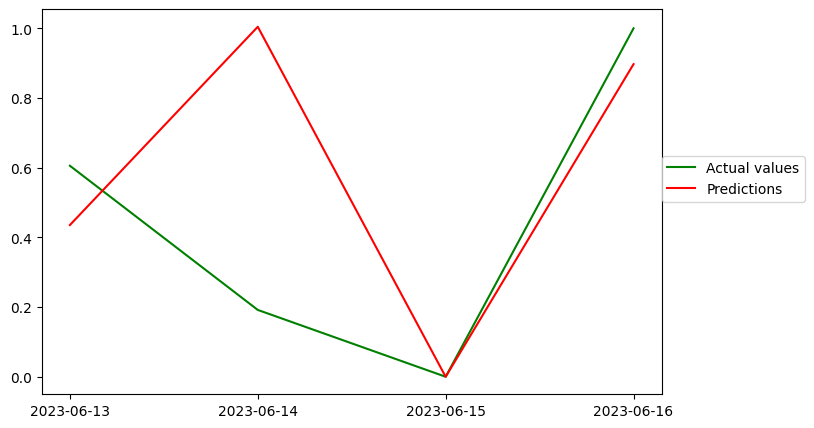

In [51]:
fig, ax = plt.subplots(figsize =(8,5))
x = norm_df.index
ax.plot(x,norm_df['Close'],c ='g',label ="Actual values")
ax.plot(x,pd.DataFrame(predictions),c ='r',label ="Predictions")
ax.legend(loc =(1,0.5));

**Decision Tree**

In [53]:
predictions = DecisionTree_model.predict(norm_df.drop(['Close','High','Low','Adj Close'],axis =1))
predictions

array([4.20297529e-01, 9.86916635e-01, 4.87468513e-04, 8.38312612e-01])

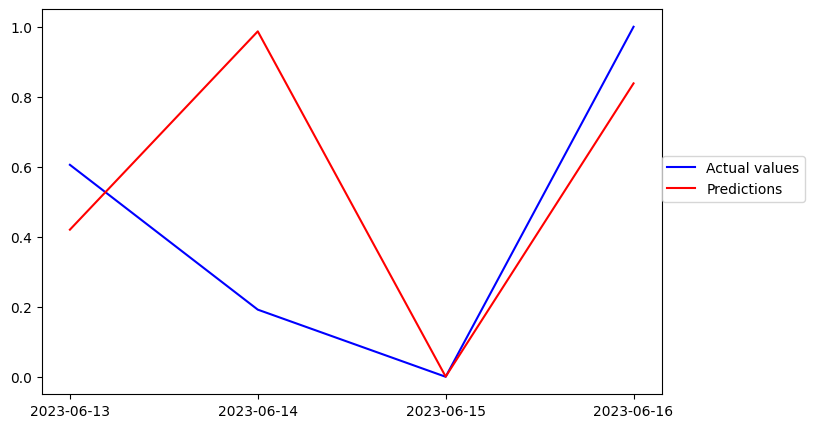

In [54]:
fig, ax = plt.subplots(figsize =(8,5))
x = norm_df.index
ax.plot(x,norm_df['Close'],c ='b',label ="Actual values")
ax.plot(x,pd.DataFrame(predictions),c ='r',label ="Predictions")
ax.legend(loc =(1,0.5));

**KNN**

In [55]:
predictions = knn.predict(norm_df.drop(['Close','High','Low','Adj Close'],axis =1))
predictions

array([0.43650784, 0.61624976, 0.00079006, 0.71957611])

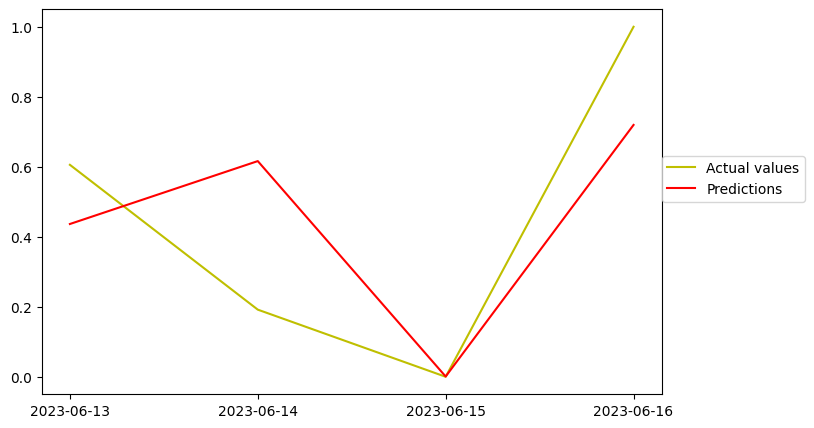

In [56]:
fig, ax = plt.subplots(figsize =(8,5))
x = norm_df.index
ax.plot(x,norm_df['Close'],c ='y',label ="Actual values")
ax.plot(x,pd.DataFrame(predictions),c ='r',label ="Predictions")
ax.legend(loc =(1,0.5));